

```
# This is formatted as code
```

# PyTorch computer vision

* See reference book - https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision - https://docs.pytorch.org/vision/stable/index.html
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transform` - functions for manipulating your vision data (images) to be suitable for use with a ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [1]:
# import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

# Extra libraries
import numpy as np
import matplotlib.pyplot as plt
import requests
from pathlib import Path
import pandas as pd

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


## 1. Getting a dataset

The dataset we'll be using is FashionMNIST[https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html]

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root = "data", # Where to downlaod the dataset too
    train = True, # Do we want the training dataset?
    download = True, # Do we want to download the dataset, yes/no?
    transform = ToTensor(), # or we can go "torchvision.transforms.ToTensor()"
    target_transform = None # how do we want to transform the labels/target
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 13.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.50MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.29MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
# The label in the train_data above is showing 9 at the end which points to the type of data that tensor is representing which is "Ankle boot"
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input output shapes of our data

In [8]:
print(f"Image Shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

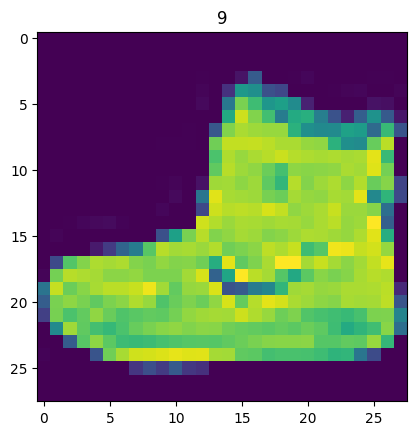

In [9]:
image, label = train_data[0]
print(f"image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

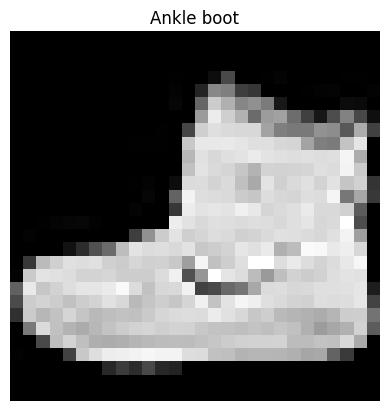

In [10]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)

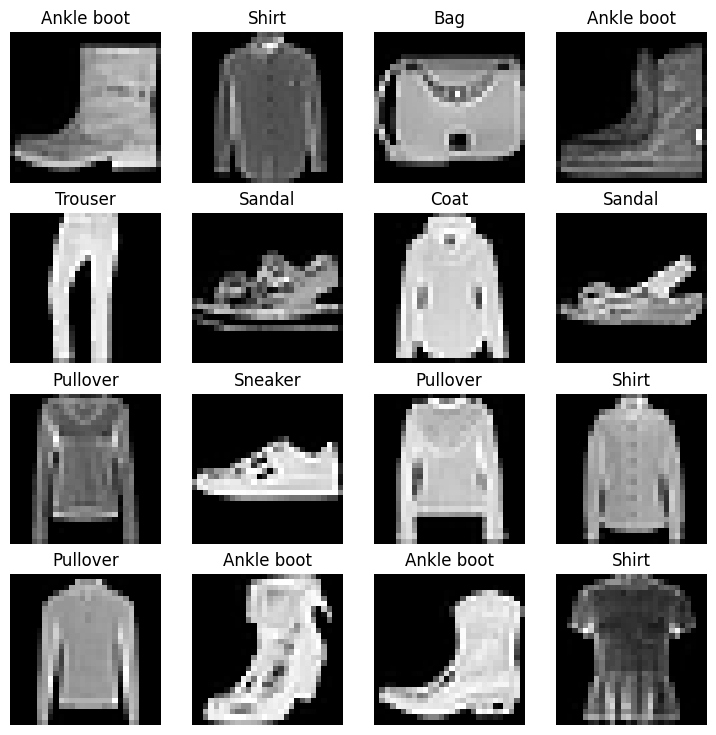

In [11]:
# Plot more imagees
torch.manual_seed(42)
fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

## 2. Prepare DataLoader

Right now, our data is in thr form of PyTorch Datasets

DataLoader turns our dataset into Python iterable

More, specifically, we want to turn our data into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch.

In [12]:
# Import DataLoader from torch.utils.data (I did it in the first cell)
# setup the batch size hyperparameter
BATCH_SIZE = 32

# Trun datasets into itearbles (batches)
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x799e39676d80>,
 <torch.utils.data.dataloader.DataLoader at 0x799e398d5730>)

In [13]:
# Check out your created data
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x799e39676d80>, <torch.utils.data.dataloader.DataLoader object at 0x799e398d5730>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [14]:
# Check out what's inside training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


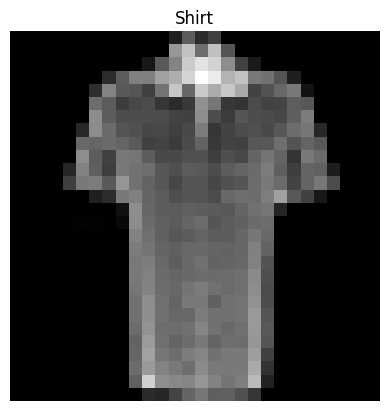

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, its best practise to start with a beseline mdoel.

A baseline model is a simple model you will try to improve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary

In [16]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [17]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
      super().__init__()
      self.layer_stack = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features = input_shape,
                    out_features = hidden_units),
          nn.Linear(in_features = hidden_units,
                    out_features = output_shape)
      )

  def forward(self, x):
      return self.layer_stack(x)

In [18]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # this is 28*28
    hidden_units = 10, # How many units in hidden layer
    output_shape = len(class_names) # one for every class
)

model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)
print(model_0(dummy_x))
print(f"Shape of dummy_x: {model_0(dummy_x).shape}")

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)
Shape of dummy_x: torch.Size([1, 10])


### 3.1 Setup loss, optimizer and evaluation matrics

* Loss function = since we're working with multi-class data, our loss dunction will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [20]:
# Download helper function form Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb")as f:
    f.write(request.content)

In [21]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy value etc)
2. How fast it runs

In [22]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

In [23]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start = start_time, end = end_time, device = "cpu")

Train time on cpu:  0.000 seconds


5.83960000000161e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train_loss *per batch*
3. Loop througgh testing batches, perform testing steps, calculate the test loss per batch.
4. Print out for clarity
5. Time it all

In [24]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y).item() # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu:  35.570 seconds


In [25]:
str(next(model_0.parameters()).device)

'cpu'

## 4. Make predictions and get model_0 results

In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim = 1))

    # Scale loss and accuracy to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name": model.__class__.__name__, # This only works when model was created with a class
         "model_loss": loss.item(),
         "model_acc": acc,}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [27]:
## Setup device agnostic-code(for using GPU if there is one)

In [28]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [29]:
torch.cuda.is_available()

False

In [30]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02

In [31]:
# Create a model with linear and non-linear layer
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten inputs into single vector
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)


In [32]:
# Create an instance of model_1
model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.1 Creating loss and optimizer for model_1

In [33]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* Training loop - `train_step()`
* Testing loop - `test_step()`

In [34]:
def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader"""

  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through training batches
  for batch, (X, y) in enumerate(data_loader):
      # Put data on target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculate loss (per batch)
      loss = loss_fn(y_pred, y)
      train_loss += loss.item() # accumulatively add up the loss per epoch
      train_acc += accuracy_fn(y_true = y,
                               y_pred = y_pred.argmax(dim = 1)) # fo from logits -> prediction labels

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backward
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

  # Divide total train loss and acc by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss: 5f} | Train acc: {train_acc: 2f}%")

In [35]:
def test_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  # Setup variables for accumulatively adding up loss and accuracy
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
      for X, y in data_loader:
        # Put data on device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        test_pred = model(X)

        # 2. Calculate loss/acc
        test_loss += loss_fn(test_pred, y).item() # accumulatively add up the loss per epoch
        test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

      # Adjust metrics and print out
      test_loss /= len(data_loader)
      test_acc /= len(data_loader)
      print(f"Test loss: {test_loss: 5f} | Test acc: {test_acc: 2f}%\n")

In [36]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch}\n----------")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
----------
Train loss:  1.114560 | Train acc:  58.463333%
Test loss:  0.963200 | Test acc:  63.408546%

Epochs: 1
----------
Train loss:  0.909052 | Train acc:  64.866667%
Test loss:  0.745445 | Test acc:  72.613818%

Epochs: 2
----------
Train loss:  0.595065 | Train acc:  78.256667%
Test loss:  0.495337 | Test acc:  82.677716%

Train time on cpu:  38.996 seconds


> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU

> Why is this?

> 1. It could be that the overhead for copying data/model to and from the GPU outweights the coumpute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms of compute capability than the GPU.

In [37]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [38]:
total_train_time_model_0

35.569825705

In [39]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [40]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device = device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make data device agnostic
      X, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim = 1))

    # Scale loss and accuracy to find the average loss/axx per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name": model.__class__.__name__, # This only works when model was created with a class
         "model_loss": loss.item(),
         "model_acc": acc}

In [41]:
# Get model_1 results dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.495336651802063,
 'model_acc': 82.67771565495208}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets

CNN's are known for their capabilities to find pattern in visual data.

In [42]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """Model architecture that replicates the TinyVGG model from CNN explainer website"""

  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1), # values we can set ourselves in nn are refreed to as hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, # three's a trick to calculate this...
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [43]:
image.shape

torch.Size([1, 28, 28])

In [44]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1, # The input_shape is 1 since we are using a dataset with 1 color_channel(gray). If it was colored image, we would use input_shape = 3
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

In [45]:
rand_image_tensor = torch.randn(size = (1, 28, 28)).unsqueeze(dim = 0) # not using unsqueeze(dim = 0) will cause a shape mismatch error
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [46]:
model_2(rand_image_tensor)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

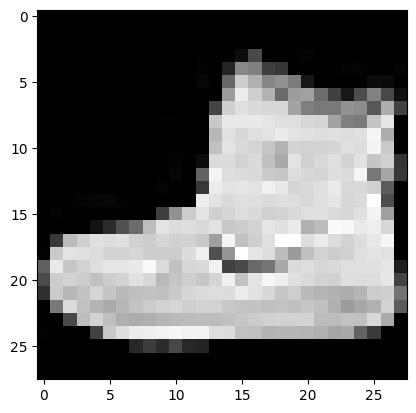

In [47]:
plt.imshow(image.squeeze(), cmap = "gray")

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for more information on `Conv2d` - https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [48]:
torch.manual_seed(42)

# Create a batch of images
images =  torch.randn(size = (32, 3, 64, 64))
test_image = images[0]

print(f"Images batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test Image: \n {test_image}")

Images batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test Image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[

In [49]:
test_image.shape

torch.Size([3, 64, 64])

In [50]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride = 1,
                       padding = 0)

# Pass the data through the concolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [51]:
test_image.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

In [52]:
# Print out the original image shape without unsqueezed dimention
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass the data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim = 0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass the data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [53]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size = (1, 1, 2, 2))
print(f"\nRandom Tensor: \n{random_tensor}")
print(f"Random Tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax Pool Tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shaep: {max_pool_tensor.shape}")


Random Tensor: 
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random Tensor shape: torch.Size([1, 1, 2, 2])

Max Pool Tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shaep: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [54]:
# Setup loss function/eval metrics/optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

### 7.4 Training and testing `model_2` using our training and test functions

In [55]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch}\n--------")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
--------
Train loss:  0.595179 | Train acc:  78.375000%
Test loss:  0.395004 | Test acc:  85.992412%

Epochs: 1
--------
Train loss:  0.365356 | Train acc:  86.901667%
Test loss:  0.352443 | Test acc:  86.910942%

Epochs: 2
--------
Train loss:  0.325875 | Train acc:  88.128333%
Test loss:  0.327190 | Test acc:  88.069089%

Train time on cpu:  157.898 seconds


In [56]:
# Get model 2 results
model_2_results = eval_model(model = model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device = device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Compare the results and training time

In [57]:
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.495337,82.677716
2,FashionMNISTModelV2,0.327190,88.069089


In [58]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,35.569826
1,FashionMNISTModelV1,0.495337,82.677716,38.996397
2,FashionMNISTModelV2,0.327190,88.069089,157.897841


Text(0, 0.5, 'model')

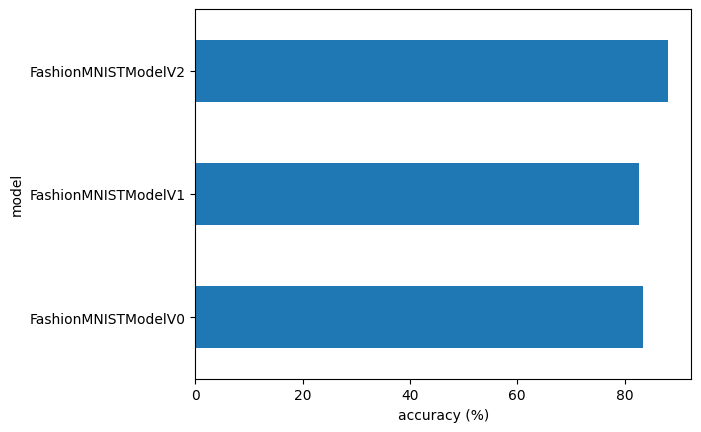

In [59]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [60]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass
      pred_logits = model(sample)

      # Get prediction probability (logit -> prediction probabilities)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim = 0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [61]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

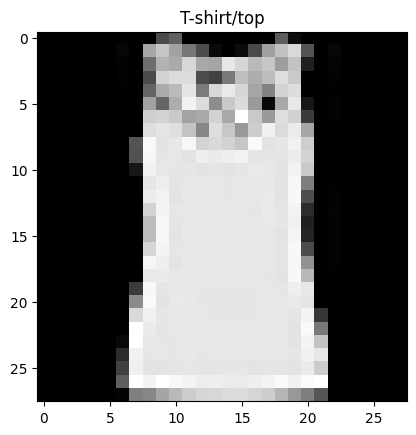

In [62]:
plt.imshow(test_samples[0].squeeze(), cmap = "gray")
plt.title(class_names[test_labels[0]])

In [63]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)
pred_probs[:2]

tensor([[8.8410e-01, 5.3491e-04, 1.2597e-03, 2.9074e-02, 1.0359e-04, 1.5850e-06,
         8.4811e-02, 4.4995e-05, 6.8168e-05, 3.6572e-06],
        [1.0627e-05, 7.9764e-06, 3.1640e-05, 1.3940e-06, 2.4195e-06, 7.5479e-03,
         9.7753e-05, 6.4879e-04, 1.8821e-03, 9.8977e-01]])

In [64]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([0, 9, 0, 3, 2, 0, 7, 2, 3])

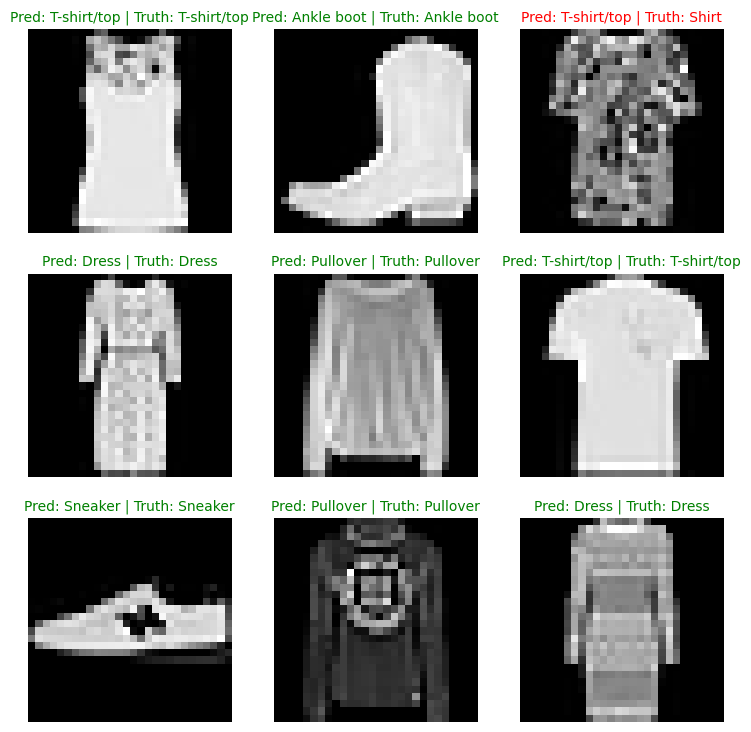

In [65]:
# Plot predictions
plt.figure(figsize = (9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change colot of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = "g")
  else:
    plt.title(title_text, fontsize = 10, c = "r")
  plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

A confusion matric is a fantastic way of evaluating your classification models visually

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [69]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making Predictions..."):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)

    # Do the forward pass
    y_logits = model_2(X)

    # Turn predictions from logits -> prediction porbabilities -> prediction labels
    y_pred = torch.softmax(y_logits.squeeze(), dim = 0).argmax(dim = 1)

    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [73]:
import mlxtend
mlxtend.__version__.split(".")[1]

'23'

In [75]:
# See if required packages are installed and if not, install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend should be >= 0.19 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 22.0 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [77]:
import mlxtend
print(mlxtend.__version__)
print(torchmetrics.__version__)

0.23.4
1.8.1


In [78]:
y_pred_tensor

tensor([9, 2, 1,  ..., 8, 1, 8])

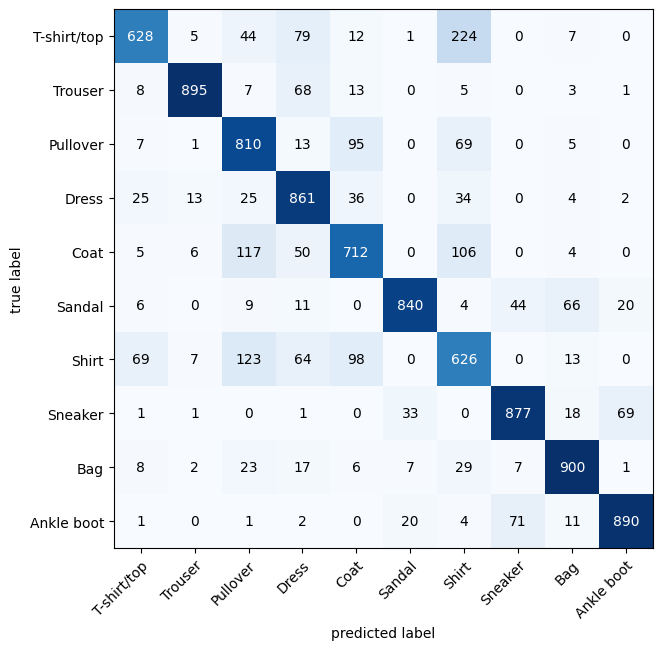

In [80]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task = "multiclass", num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names = class_names,
    figsize = (10, 7)
)

In [85]:
## 11. Save and load the best performing model
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [87]:
# Create a new Instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape = 1,
                                     hidden_units = 10,
                                     output_shape = len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [90]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [89]:
# Evaluate the loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [92]:
# Check if the model results are close to eachother
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol = 1e-02) # We can set the tolerance level if the models do not match to decide if they are usabel

tensor(True)